## Import required libraries

In [1]:
import datetime as dt
import requests
import pandas as pd
from pytrends import dailydata
import snscrape.modules.twitter as sntwitter
import time
import praw
from pmaw import PushshiftAPI

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt


In [95]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = [6.4, 4.8]

## Scrape Twitter data

In [17]:
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('omicorn since:2021-12-1 until:2021-12-21 lang:en').get_items()):
    tweets_list.append([tweet.content, tweet.user.username, tweet.date, tweet.id])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['text', 'user', 'date', 'Tweet Id'])

INFO:snscrape.modules.twitter:Retrieving scroll page None
INFO:snscrape.modules.twitter:Retrieving guest token
INFO:snscrape.base:Retrieving https://twitter.com/search?f=live&lang=en&q=omicorn+since%3A2021-12-1+until%3A2021-12-21+lang%3Aen&src=spelling_expansion_revert_click
INFO:snscrape.base:Retrieved https://twitter.com/search?f=live&lang=en&q=omicorn+since%3A2021-12-1+until%3A2021-12-21+lang%3Aen&src=spelling_expansion_revert_click: 200
INFO:snscrape.base:Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_

In [18]:
tweets_df.sort_values(by='date')

,text,user,date,Tweet Id
1964,The government of India has put New Zealand al...,indianweekender,2021-12-01 00:00:43+00:00,1465833198487810052
1963,@spectatorindex Also update total cases of omi...,pm_tripathi,2021-12-01 00:37:11+00:00,1465842378103738370
1962,do you know what you get when you shuffle the ...,kulpsmom,2021-12-01 01:02:11+00:00,1465848668024627206
1961,"I am going to spell Omicron as ""Omicorn"" in a ...",anamk10,2021-12-01 01:06:09+00:00,1465849666491195392
1960,@KennyTrades52 they are talking tomorrow about...,Dawnlop00067136,2021-12-01 01:06:54+00:00,1465849857239777281
...,...,...,...,...
4,Omicorn is spreading widely while @WHO chair i...,EmishawEskedar,2021-12-20 22:55:18+00:00,1473064496948199424
3,@BNODesk Great news the end of the pandemic is...,JaredBe74825790,2021-12-20 23:13:23+00:00,1473069046140649472
2,@DrEliDavid The Biden Administration and many...,JaredBe74825790,2021-12-20 23:14:54+00:00,1473069426215948293
1,Omicorn https://t.co/uBzfPDogdi,chancehambright,2021-12-20 23:39:52+00:00,1473075709228822542


In [19]:
df = tweets_df

In [20]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [21]:
df.head()

,text,user,date,Tweet Id
0,@Khairykj @DGHisham isn’t it time to have prop...,omarmu,2021-12-20,1473077958302568448
1,Omicorn https://t.co/uBzfPDogdi,chancehambright,2021-12-20,1473075709228822542
2,@DrEliDavid The Biden Administration and many...,JaredBe74825790,2021-12-20,1473069426215948293
3,@BNODesk Great news the end of the pandemic is...,JaredBe74825790,2021-12-20,1473069046140649472
4,Omicorn is spreading widely while @WHO chair i...,EmishawEskedar,2021-12-20,1473064496948199424


### Get tweet value counts date wise

In [22]:
tweet_counts = df['date'].value_counts().rename_axis('date').reset_index(name='counts')

In [23]:
tweet_counts

,date,counts
0,2021-12-01,182
1,2021-12-02,182
2,2021-12-03,178
3,2021-12-20,125
4,2021-12-06,113
5,2021-12-17,112
6,2021-12-05,102
7,2021-12-15,92
8,2021-12-16,91
9,2021-12-08,87


In [24]:
tweet_counts = tweet_counts.sort_values(by='date')

In [25]:
tweet_counts

,date,counts
0,2021-12-01,182
1,2021-12-02,182
2,2021-12-03,178
13,2021-12-04,76
6,2021-12-05,102
4,2021-12-06,113
10,2021-12-07,80
9,2021-12-08,87
15,2021-12-09,72
18,2021-12-10,58


In [26]:
dates = tweet_counts['date'].to_list()

In [27]:
counts = tweet_counts['counts'].to_list()

### Plot tweet counts vs date for the selected time interval

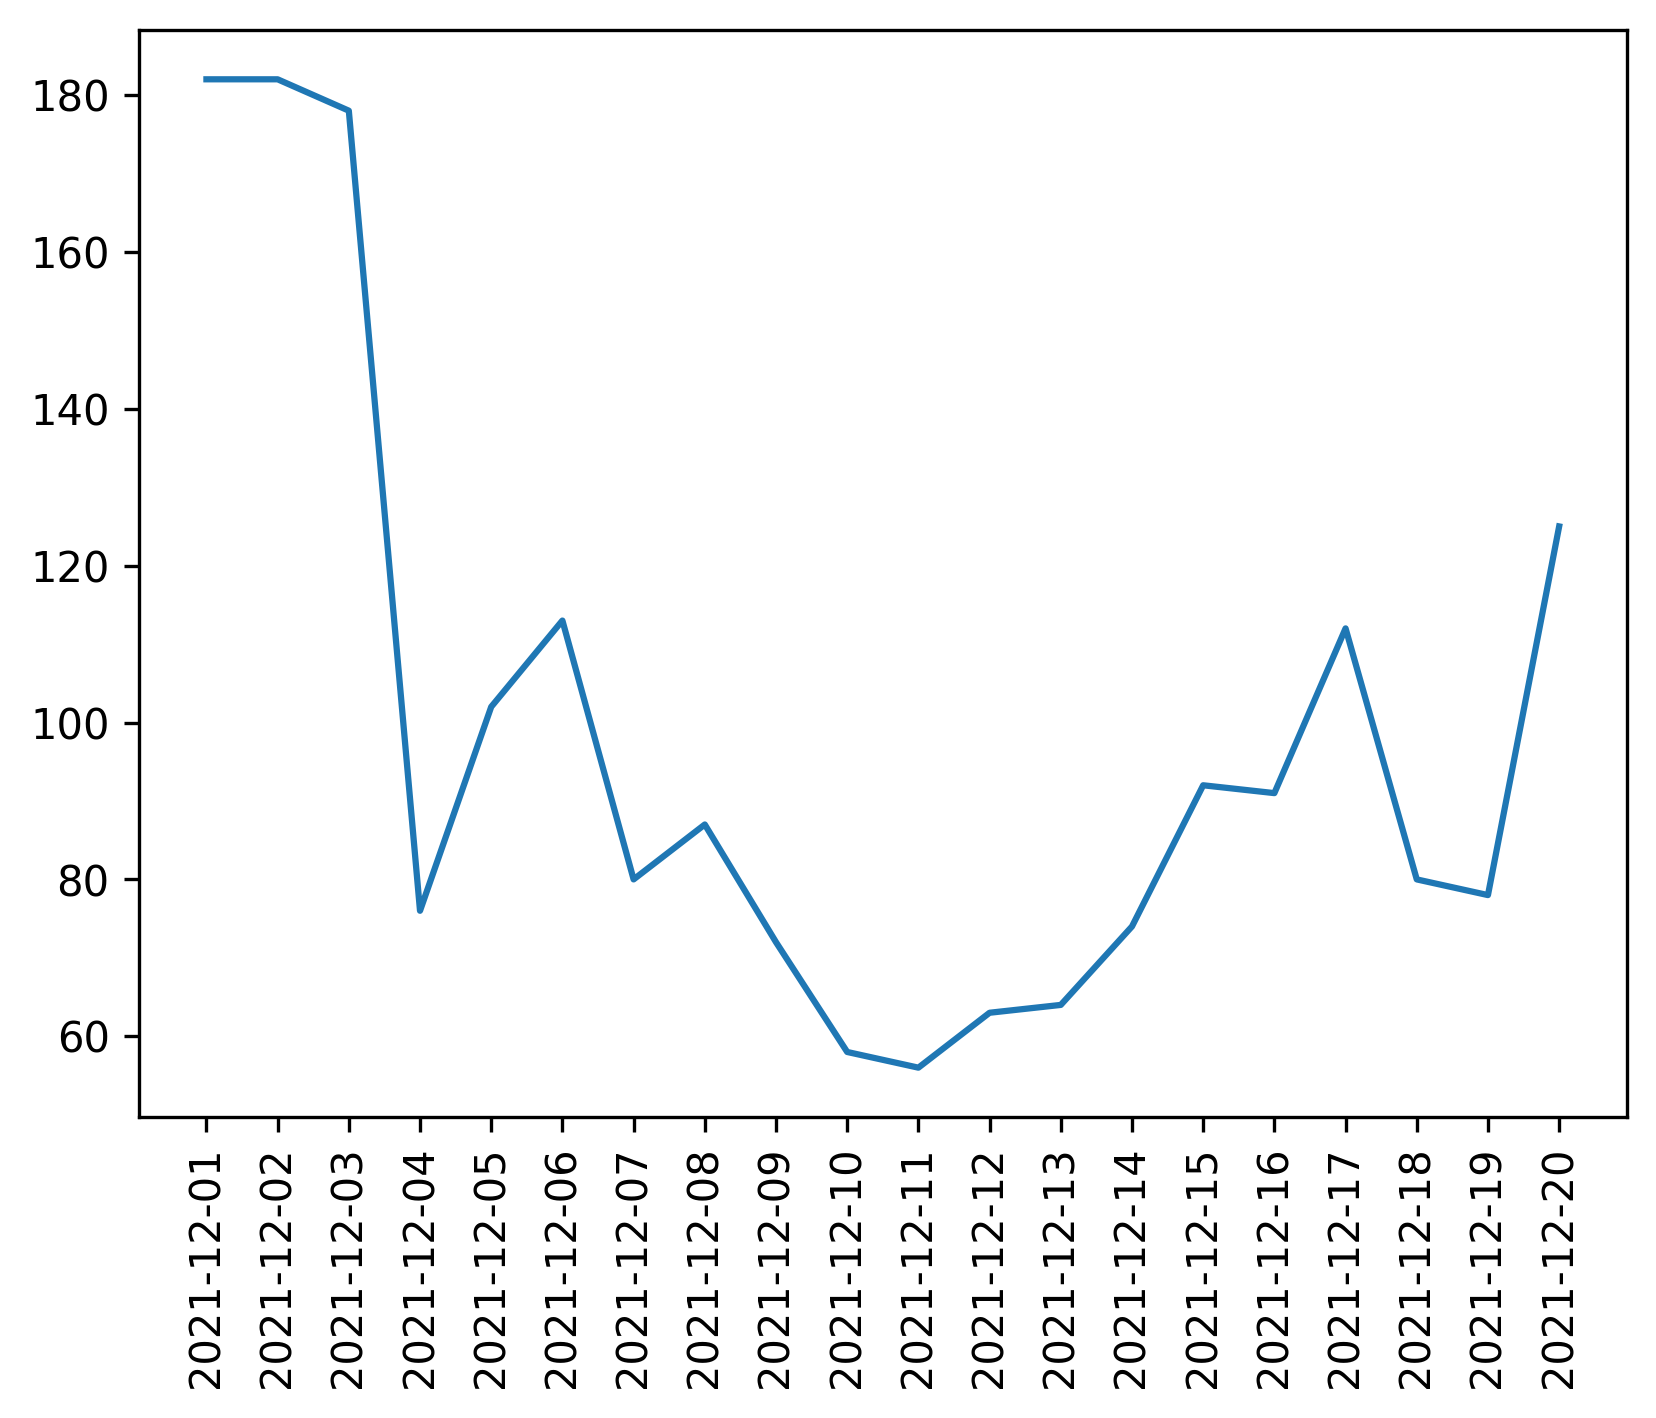

In [96]:
plt.plot(dates, counts)
plt.xticks(dates, rotation=90)
plt.show()

## Scrape Reddit Data

In [32]:
api = PushshiftAPI()

In [54]:
after = int(dt.datetime(2021,12,1,0,0).timestamp())
before = int(dt.datetime(2021,12,20,0,0).timestamp())

In [55]:
after

1638334800

In [56]:
before

1639976400

In [57]:
#subreddit="wallstreetbets"
limit=None
comments = api.search_comments(q="omicorn", limit=limit, before=before, after=after)
print(f'Retrieved {len(comments)} posts from Pushshift')

INFO:pmaw.PushshiftAPIBase:173 result(s) available in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 173 posts from Pushshift


In [58]:
comments_df = pd.DataFrame(comments)

In [59]:
comments_df.head()

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,awarders,retrieved_on,media_metadata
0,[],False,None,zxc123zxc123,None,None,[],None,None,None,...,t5_2qhhq,r/investing,public,None,0,[],None,NaN,NaN,NaN
1,[],NaN,None,pizzaworshipper,None,None,[],None,None,None,...,t5_2qh1i,NaN,NaN,None,0,[],None,[],1.640163e+09,NaN
2,[],NaN,None,Merisorrr123,None,None,[],None,None,None,...,t5_2qm35,NaN,NaN,None,0,[],None,[],1.640042e+09,NaN
3,[],NaN,None,Vince_vishal96,None,None,[],None,None,None,...,t5_2qp4r,NaN,NaN,None,0,[],None,[],1.639869e+09,NaN
4,[],NaN,None,Bored_Cosmic_Horror,None,None,[],None,None,None,...,t5_2x4yx,NaN,NaN,None,0,[],None,[],1.639828e+09,NaN


In [60]:
df1 = comments_df

### Convert date format from timestamp to datetime

In [61]:
df1['date'] = df1['created_utc'].apply(lambda x: int(x))

In [62]:
df1.head()

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,awarders,retrieved_on,media_metadata,date
0,[],False,None,zxc123zxc123,None,None,[],None,None,None,...,r/investing,public,None,0,[],None,NaN,NaN,NaN,1638651437
1,[],NaN,None,pizzaworshipper,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.640163e+09,NaN,1638650673
2,[],NaN,None,Merisorrr123,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.640042e+09,NaN,1638635545
3,[],NaN,None,Vince_vishal96,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.639869e+09,NaN,1638601716
4,[],NaN,None,Bored_Cosmic_Horror,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.639828e+09,NaN,1638594220


In [63]:
df1['date'] = df1['date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))

In [64]:
df1.head()

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,awarders,retrieved_on,media_metadata,date
0,[],False,None,zxc123zxc123,None,None,[],None,None,None,...,r/investing,public,None,0,[],None,NaN,NaN,NaN,2021-12-04
1,[],NaN,None,pizzaworshipper,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.640163e+09,NaN,2021-12-04
2,[],NaN,None,Merisorrr123,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.640042e+09,NaN,2021-12-04
3,[],NaN,None,Vince_vishal96,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.639869e+09,NaN,2021-12-04
4,[],NaN,None,Bored_Cosmic_Horror,None,None,[],None,None,None,...,NaN,NaN,None,0,[],None,[],1.639828e+09,NaN,2021-12-04


### Get Reddit comment value counts date wise

In [65]:
df1['date'].value_counts()

2021-12-19    17
2021-12-01    15
2021-12-02    14
2021-12-16    14
2021-12-06    12
2021-12-18    12
2021-12-17    10
2021-12-15    10
2021-12-14    10
2021-12-03     9
2021-12-04     9
2021-12-13     8
2021-12-07     6
2021-12-20     6
2021-12-08     5
2021-12-11     4
2021-12-12     4
2021-12-09     3
2021-12-05     3
2021-12-10     2
Name: date, dtype: int64

In [66]:
reddit_counts = df1['date'].value_counts().rename_axis('date').reset_index(name='counts')

In [67]:
reddit_counts

,date,counts
0,2021-12-19,17
1,2021-12-01,15
2,2021-12-02,14
3,2021-12-16,14
4,2021-12-06,12
5,2021-12-18,12
6,2021-12-17,10
7,2021-12-15,10
8,2021-12-14,10
9,2021-12-03,9


In [68]:
reddit_counts = reddit_counts.sort_values(by='date')

In [69]:
reddit_counts

,date,counts
1,2021-12-01,15
2,2021-12-02,14
9,2021-12-03,9
10,2021-12-04,9
18,2021-12-05,3
4,2021-12-06,12
12,2021-12-07,6
14,2021-12-08,5
17,2021-12-09,3
19,2021-12-10,2


In [70]:
dates1 = reddit_counts['date'].to_list()

In [71]:
counts1 = reddit_counts['counts'].to_list()

### Plot Reddit comment counts vs date for the selected time interval

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


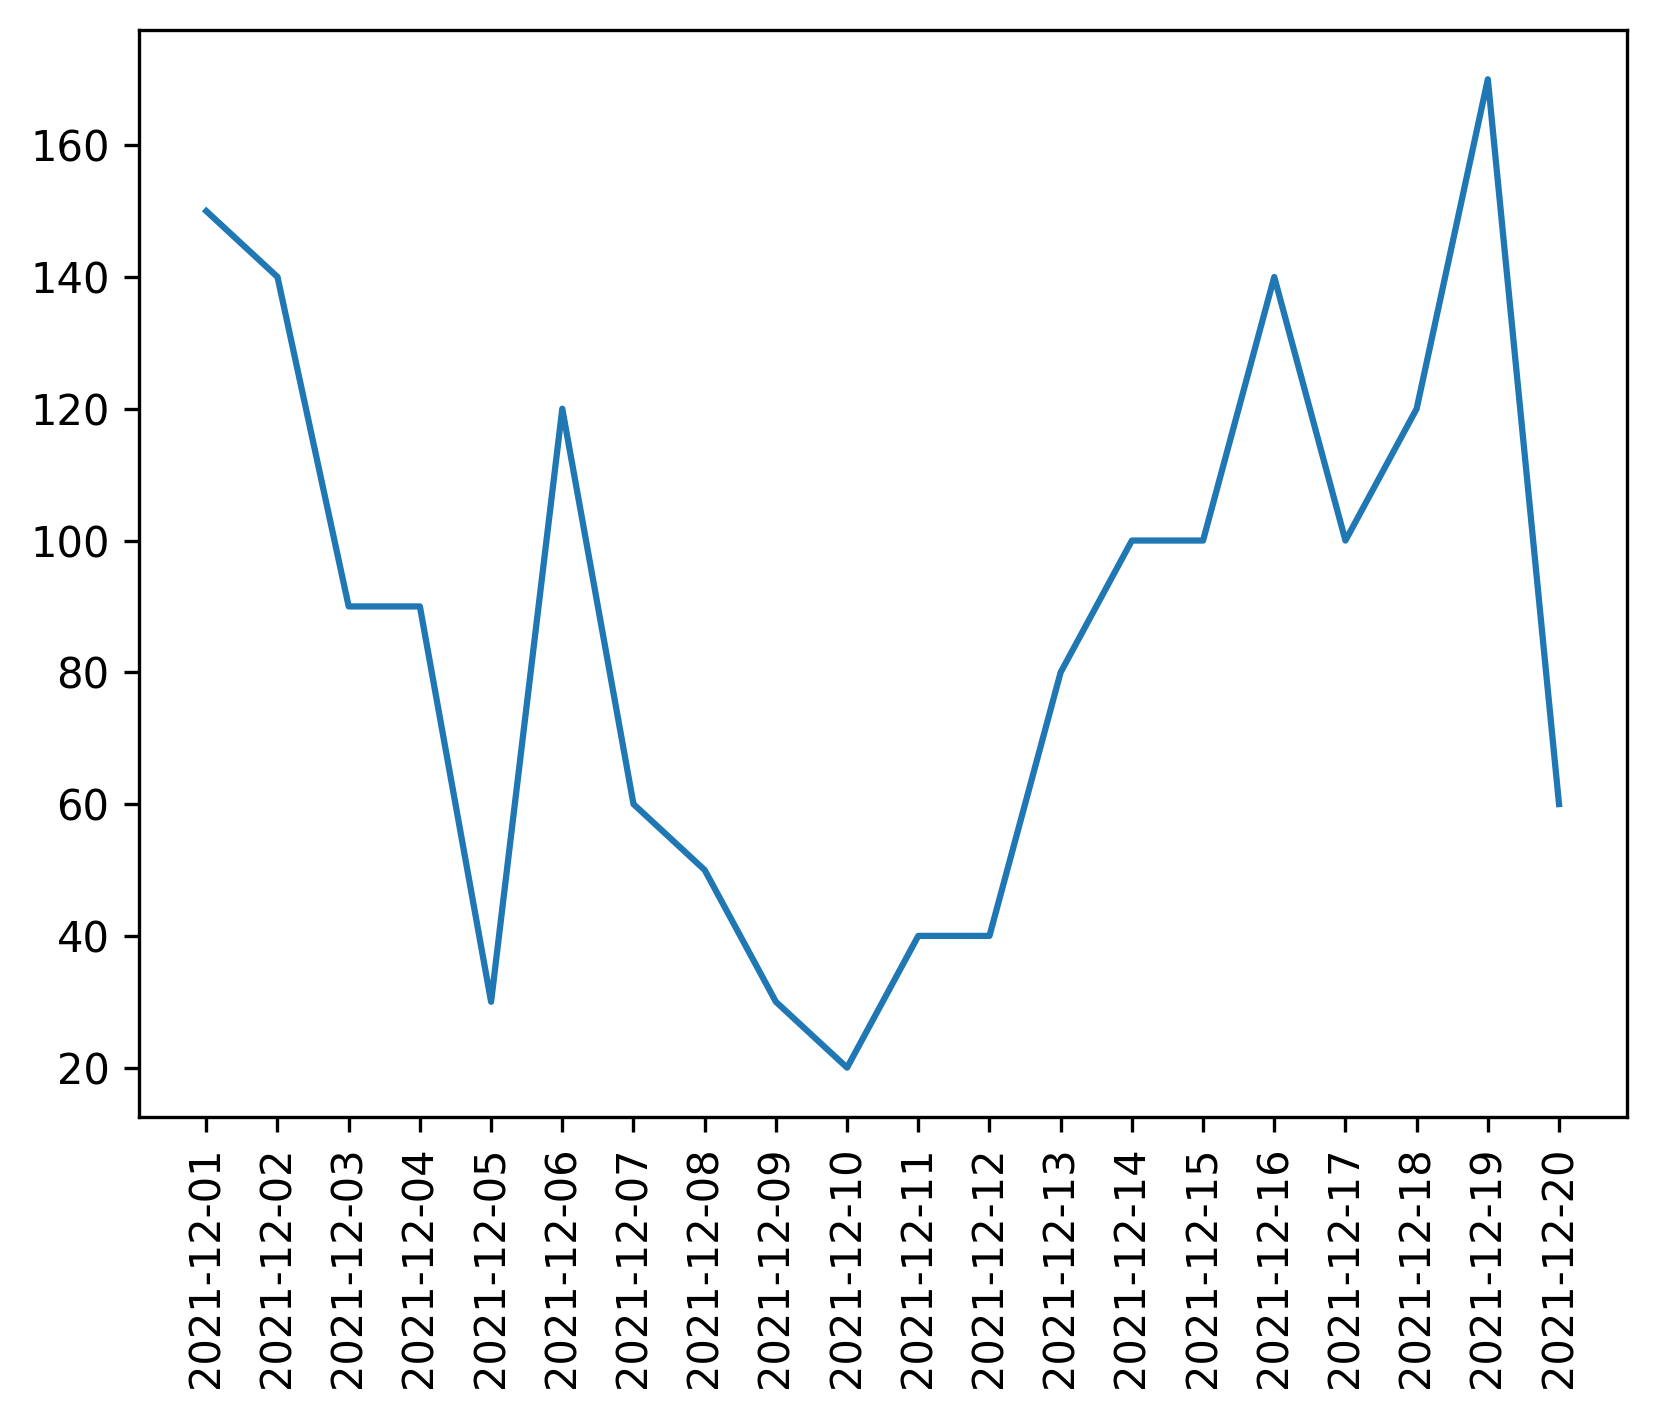

In [97]:
plt.plot(dates1, [x * 10 for x in counts1])
plt.xticks(rotation=90)
plt.show()